### Visualize the CBI Data

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
combined_df = pd.read_csv('../data/processed/processed.csv')

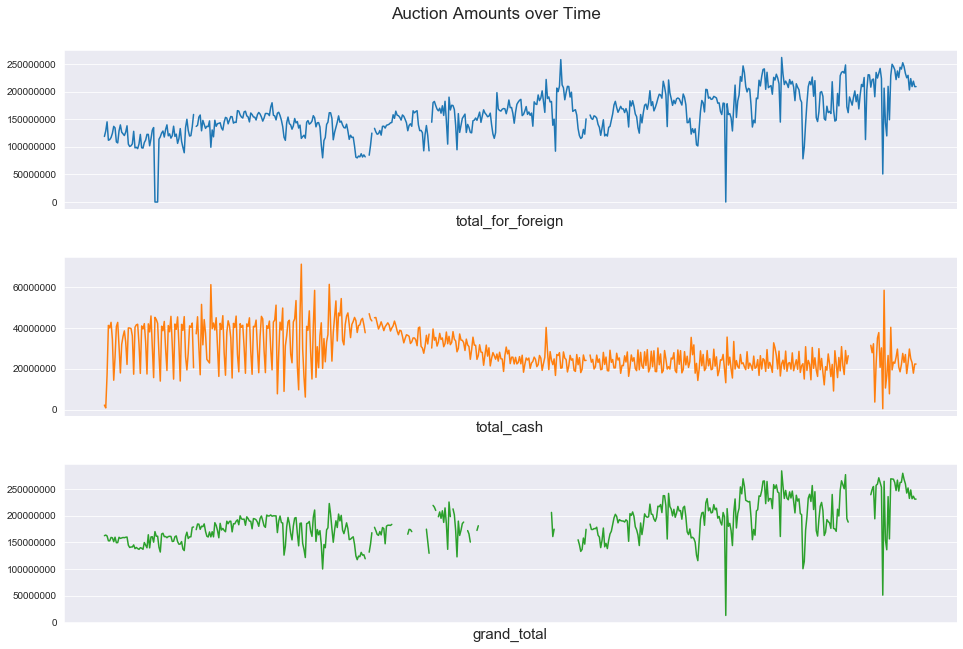

In [3]:
amounts = ['total_for_foreign','total_cash','grand_total']
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=[16,10])
palette = itertools.cycle(sns.color_palette())

for ax, var in zip(axes.flat,amounts):
    c = next(palette)
    combined_df[var].plot(ax=ax,color=c)
    ax.set_xlabel(var,fontsize=15,labelpad=5)
    ax.ticklabel_format(useOffset=False, style='plain')
    ax.set_xticks([])

plt.subplots_adjust(top=0.92, hspace=0.3)
fig.suptitle("Auction Amounts over Time",fontsize=17)
plt.show()

### Find Significant Dates

In [4]:
# have to find first sanctions date 06 Aug 2018 manually
combined_df[223:230]

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
223,تـاريخ البيع - ليوم الثلاثاء 2018/7/31 والمنفذ...,148455683.0,38580000.0,NaN,علماً أن :,https://cbi.iq/currency_auction/view/357
224,تـاريخ البيع - ليوم الأربعاء 2018/8/1 والمنفذ ...,157813954.0,35890000.0,NaN,علماً أن :,https://cbi.iq/currency_auction/view/359
225,تـاريخ البيع - ليوم الخميس 2018/8/2 والمنفذ يو...,155410710.0,32700000.0,NaN,علماً أن :,https://cbi.iq/currency_auction/view/360
226,تـاريخ البيع - ليوم الاحد 2018/8/5 والمنفذ يوم...,149895406.0,34800000.0,NaN,علماً أن :,https://cbi.iq/currency_auction/view/361
227,تـاريخ البيع - ليوم الأثنين 2018/8/6 والمنفذ ي...,143689384.0,36650000.0,NaN,علماً أن :,https://cbi.iq/currency_auction/view/362
228,تـاريخ البيع - ليوم الثلاثاء 2018/8/7 والمنفذ ...,129150812.0,36380000.0,165530812.0,علماً أن :,https://cbi.iq/currency_auction/view/363
229,تـاريخ البيع - ليوم الاربعاء 2018/8/8 والمنفذ ...,138758900.0,35890000.0,174648900.0,علماً أن :,https://cbi.iq/currency_auction/view/364


Marker at 227

In [5]:
# full re-implementation 04 Nov 2018
# marker at 291
combined_df[290:296]

,date,total_for_foreign,total_cash,grand_total,exchange_rate,url
290,تـاريخ البيع - ليوم الخميس 2018/11/1 والمنفذ ي...,161077960.0,21390000.0,NaN,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/426
291,تـاريخ البيع - ليوم الأحد 2018/11/4 والمنفذ يو...,140016142.0,25090000.0,NaN,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/427
292,تـاريخ البيع - ليوم الأثنين 2018/11/5 والمنفذ ...,123251750.0,27930000.0,NaN,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/428
293,تـاريخ البيع - ليوم الثلاثاء 2018/11/6 والمنفذ...,115421820.0,26430000.0,NaN,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/429
294,تـاريخ البيع - ليوم الاربعاء 2018/11/7 والمنفذ...,125725602.0,24690000.0,NaN,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/430
295,تـاريخ البيع - ليوم الخميس 2018/11/8 والمنفذ ي...,198250489.0,27230000.0,NaN,سعر بيع المبالغ المحولة لحسابات المصارف في الخ...,https://cbi.iq/currency_auction/view/431


### Plotly Visualization

In [6]:
import plotly.graph_objects as go
import plotly.express as px
import chart_studio
import chart_studio.plotly as py

In [7]:
chart_studio.tools.set_credentials_file(username='mpokornyus', api_key='lCQZVPTfz34b9OmGmiWN')

In [8]:
graph_data_1 = combined_df.total_for_foreign

In [9]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=combined_df.index,y=combined_df.total_for_foreign,
                        mode='lines',
                        name='Total for Covering Foreign Accounts'))
fig.add_trace(go.Scatter(x=combined_df.index,y=combined_df.total_for_foreign.rolling(15, win_type='triang').mean(),
                        mode='lines',
                        name='15-session Rolling Average'))

# Add lines for each bit of sanctions news
fig.update_layout(
    shapes=[
        # JCPOA withdrawal announcement
        go.layout.Shape(
            type='line',
            x0=164,
            y0=-30000000,
            x1=164,
            y1=300000000,
            line=dict(
                color="gray",
                width=3,
            ),
            layer='below',
            opacity=.3
        ),
        # line for 06 Aug 2018 first wave
        go.layout.Shape(
            type='line',
            x0=227,
            y0=-30000000,
            x1=227,
            y1=300000000,
            line=dict(
                color='gray',
                width=3,
            ),
            layer='below',
            opacity=.3
        ),
        # Line for full implementation snapback
        go.layout.Shape(
            type='line',
            x0=291,
            y0=-30000000,
            x1=291,
            y1=300000000,
            line=dict(
                color='gray',
                width=3
            ),
            layer='below',
            opacity=.3
        )
    ]
)
annotations=[
        dict(x=227,
            y=200000000,
            text='6 Aug 2018 Snapback',
            xanchor='right',
            font=dict(family='Arial',
                     size=14,
                     color='gray')),
        dict(x=164,
            y=30000000,
            text='8 May 2018 Announcement',
            xanchor='right',
            font=dict(family='Arial',
                     size=14,
                     color='gray')),
        dict(x=291,
            y=30000000,
            text='4 Nov 2018 Snapback',
            font=dict(family='Arial',
                     size=14,
                     color='gray'),
            align='left',
            )
    ]
fig.update_layout(annotations=annotations)
fig.update_xaxes(
    ticktext=["1 Jan 2018","1 Jan 2019"],
    tickvals=[76,334]
)
fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    yaxis=dict(
        showgrid=False,
        showline=False
))
fig.update_yaxes(title_text='Amount Auctioned')
fig.update_layout(
    title=go.layout.Title(
        text='Total for Covering Foreign Accounts Since September 2017',
        x=.15
    )
)


# fig.show()
py.iplot(fig, filename='CBI Plot 1')

In [10]:
# Given the data issues with the grand total column, I will compute my own
combined_df['fab_grand_total'] = combined_df.total_for_foreign + combined_df.total_cash

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=combined_df.index,y=combined_df.fab_grand_total,
                        mode='lines',
                        name='Grand Total'))
fig.add_trace(go.Scatter(x=combined_df.index,y=combined_df.fab_grand_total.rolling(15, win_type='triang').mean(),
                        mode='lines',
                        name='15-session Rolling Average'))

# Add lines for each bit of sanctions news
fig.update_layout(
    shapes=[
        # JCPOA withdrawal announcement
        go.layout.Shape(
            type='line',
            x0=164,
            y0=-30000000,
            x1=164,
            y1=300000000,
            line=dict(
                color="gray",
                width=3,
            ),
            layer='below',
            opacity=.3
        ),
        # line for 06 Aug 2018 first wave
        go.layout.Shape(
            type='line',
            x0=227,
            y0=-30000000,
            x1=227,
            y1=300000000,
            line=dict(
                color='gray',
                width=3,
            ),
            layer='below',
            opacity=.3
        ),
        # Line for full implementation snapback
        go.layout.Shape(
            type='line',
            x0=291,
            y0=-30000000,
            x1=291,
            y1=300000000,
            line=dict(
                color='gray',
                width=3
            ),
            layer='below',
            opacity=.3
        )
    ]
)
annotations=[
        dict(x=227,
            y=230000000,
            text='6 Aug 2018 Snapback',
            xanchor='right',
            font=dict(family='Arial',
                     size=14,
                     color='gray')),
        dict(x=164,
            y=30000000,
            text='8 May 2018 Announcement',
            xanchor='right',
            font=dict(family='Arial',
                     size=14,
                     color='gray')),
        dict(x=291,
            y=30000000,
            text='4 Nov 2018 Snapback',
            font=dict(family='Arial',
                     size=14,
                     color='gray'),
            align='left',
            )
    ]
fig.update_layout(annotations=annotations)
fig.update_xaxes(
    ticktext=["1 Jan 2018","1 Jan 2019"],
    tickvals=[76,334]
)
fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    yaxis=dict(
        showgrid=False,
        showline=False
))
fig.update_yaxes(title_text='Amount Auctioned')
fig.update_layout(
    title=go.layout.Title(
        text='Grand Total Since September 2017',
        x=.15
    )
)


# fig.show()
py.iplot(fig, filename='CBI Plot - Grand Total')